### **``Packages Import``**

In [1]:
import os
import sys
import logging

logging.basicConfig(filename="Logs_interpret_models.log",
                    filemode='w',
                    level=logging.INFO,
                    format="%(asctime)s : %(levelname)s : %(message)s")

try :
    logging.info("#### Start packages import ####")
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn
    import shap
    import eli5
    import lime
    import pydotplus
    import pdpbox
    import dtreeviz
    import helo
except ModuleNotFoundError as import_error:
    logging.error(msg=(import_error.__class__.__name__ + " :: {} not found".format(import_error.name)))

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.


### **``Import Datasets``**

In [2]:
pd.set_option('display.max_columns',35)

In [3]:
heart_failure_df = pd.read_csv(os.getcwd()+"\\datasets\\heart_failure\\heart_failure_clinical_records_dataset.csv")
heart_failure_df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


### **``Very basic checks``**

In [4]:
heart_failure_df['anaemia'].unique()

array([0, 1], dtype=int64)

In [5]:
heart_failure_df['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

In [6]:
heart_failure_df['time'].unique()

array([  4,   6,   7,   8,  10,  11,  12,  13,  14,  15,  16,  20,  22,
        23,  24,  26,  27,  28,  29,  30,  31,  32,  33,  35,  38,  40,
        41,  42,  43,  44,  45,  50,  54,  55,  59,  60,  61,  63,  64,
        65,  66,  67,  68,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  82,  83,  85,  86,  87,  88,  90,  91,  94,  95,  96,  97,
       100, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117,
       118, 119, 120, 121, 123, 126, 129, 130, 134, 135, 140, 145, 146,
       147, 148, 150, 154, 162, 170, 171, 172, 174, 175, 180, 185, 186,
       187, 188, 192, 193, 194, 195, 196, 197, 198, 200, 201, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 220, 230, 231,
       233, 235, 237, 240, 241, 244, 245, 246, 247, 250, 256, 257, 258,
       270, 271, 278, 280, 285], dtype=int64)

### **``Train/Test Split``**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = heart_failure_df.iloc[:,:-2]

In [9]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0


In [10]:
X.shape

(299, 11)

In [11]:
heart_failure_df['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

In [12]:
y = heart_failure_df['DEATH_EVENT']

In [13]:
type(y)

pandas.core.series.Series

In [14]:
y.shape

(299,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.25,random_state=44)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((224, 11), (75, 11), (224,), (75,))

In [17]:
X.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1


### **``Model Training and Testing``**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [149]:
log_reg = LogisticRegression()
dt = DecisionTreeClassifier(class_weight="balanced", max_depth=10, min_samples_split=.01)
rf = RandomForestClassifier()
xg = XGBClassifier()

In [115]:
lr_model = log_reg.fit(X_train,y_train)
dt_model = dt.fit(X_train,y_train)
rf_model = rf.fit(X_train,y_train)
xg_model = xg.fit(X_train,y_train)

In [117]:
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xg_pred = xg_model.predict(X_test)

### **``Testing Results``**

In [118]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report

In [119]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        51
           1       0.54      0.58      0.56        24

    accuracy                           0.71        75
   macro avg       0.67      0.67      0.67        75
weighted avg       0.71      0.71      0.71        75



### **``Interpreting Models``**

#### **``Working with SHAP``**

In [120]:
dir(shap)

['AdditiveExplainer',
 'DeepExplainer',
 'Explainer',
 'Explanation',
 'GradientExplainer',
 'KernelExplainer',
 'LinearExplainer',
 'PartitionExplainer',
 'PermutationExplainer',
 'SamplingExplainer',
 'TreeExplainer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_cext',
 '_explanation',
 'approximate_interactions',
 'bar_plot',
 'datasets',
 'decision_plot',
 'dependence_plot',
 'embedding_plot',
 'explainers',
 'force_plot',
 'getjs',
 'group_difference_plot',
 'have_matplotlib',
 'image_plot',
 'initjs',
 'kmeans',
 'links',
 'maskers',
 'matplotlib',
 'monitoring_plot',
 'multioutput_decision_plot',
 'other',
 'partial_dependence_plot',
 'plots',
 'sample',
 'save_html',
 'summary_plot',
 'sys',
 'text_plot',
 'unsupported',
 'utils',
 'warnings',
 'waterfall_plot']

##### **``Loading JS in the notebook``**

In [121]:
shap.initjs()

#### **``Understanding Decision Tree Model``**

In [122]:
explainer_dt = shap.TreeExplainer(dt_model)

In [123]:
i = 5

observation = X_test.iloc[[i]]
print("Observation Actual Result {}".format(y_test.iloc[i]))
print("Observation Prediction {}".format(dt_model.predict(observation)))
print("Observation Prediction {}".format(dt_model.predict_proba(observation)[:,1]))

Observation Actual Result 1
Observation Prediction [1]
Observation Prediction [1.]


In [124]:
observation

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
66,42.0,1,250,1,15,0,213000.0,1.3,136,0,0


In [125]:
shap_values = explainer_dt.shap_values(observation)[1]

In [126]:
shap_values

array([[-4.55778543e-02,  0.00000000e+00,  1.63397684e-02,
        -2.55012279e-03,  5.79292170e-01, -2.67883992e-03,
         2.34727952e-02, -2.12924711e-02, -4.70054457e-02,
        -1.73472348e-18,  2.77555756e-16]])

In [127]:
shap_values.shape

(1, 11)

In [128]:
explainer_dt.model.tree_output

'probability'

In [129]:
explainer_dt.expected_value

array([0.5, 0.5])

In [130]:
np.sum(shap_values)

0.4999999999999989

In [131]:
observation

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
66,42.0,1,250,1,15,0,213000.0,1.3,136,0,0


In [132]:
print("Observation Actual Result {}".format(y_test.iloc[5]))
print("Observation Prediction {}".format(dt_model.predict(X_test.iloc[[5]])))
print("Observation Prediction {}".format(dt_model.predict_proba(X_test.iloc[[5]])[:,1]))

Observation Actual Result 1
Observation Prediction [1]
Observation Prediction [1.]


In [133]:
X_test.iloc[[5]]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
66,42.0,1,250,1,15,0,213000.0,1.3,136,0,0


In [134]:
shap.force_plot(base_value=explainer_dt.expected_value[1],shap_values=shap_values,features=observation)

In [135]:
print("Observation Actual Result {}".format(y_test.iloc[4]))
print("Observation Prediction {}".format(dt_model.predict(X_test.iloc[[4]])))
print("Observation Prediction {}".format(dt_model.predict_proba(X_test.iloc[[4]])[:,1]))

Observation Actual Result 0
Observation Prediction [0]
Observation Prediction [0.]


In [136]:
pd.concat([X_test.iloc[[4]],y_test.iloc[[4]]],axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
159,59.0,1,129,0,45,1,362000.0,1.1,139,1,1,0


In [137]:
shap.force_plot(base_value=explainer_dt.expected_value[1],shap_values=explainer_dt.shap_values(X_test.iloc[4])[1],features=X_test.iloc[[4]])

In [138]:
print("Observation Actual Result {}".format(y_test.iloc[1]))
print("Observation Prediction {}".format(dt_model.predict(X_test.iloc[[1]])))
print("Observation Prediction {}".format(dt_model.predict_proba(X_test.iloc[[1]])[:,1]))

Observation Actual Result 1
Observation Prediction [1]
Observation Prediction [1.]


In [139]:
pd.concat([X_test.iloc[[1]],y_test.iloc[[1]]],axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
183,75.0,0,99,0,38,1,224000.0,2.5,134,1,0,1


In [140]:
shap.force_plot(base_value=explainer_dt.expected_value[1],shap_values=explainer_dt.shap_values(X_test.iloc[1])[1],features=X_test.iloc[[1]])

In [141]:
print("Observation Actual Result {}".format(y_test.iloc[2]))
print("Observation Prediction {}".format(dt_model.predict(X_test.iloc[[2]])))
print("Observation Prediction {}".format(dt_model.predict_proba(X_test.iloc[[2]])[:,1]))

Observation Actual Result 0
Observation Prediction [1]
Observation Prediction [1.]


In [142]:
pd.concat([X_test.iloc[[2]],y_test.iloc[[2]]],axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
274,60.0,1,257,1,30,0,150000.0,1.0,137,1,1,0


In [143]:
shap.force_plot(base_value=explainer_dt.expected_value[1],shap_values=explainer_dt.shap_values(X_test.iloc[2])[1],features=X_test.iloc[[2]])

In [144]:
print("Observation Actual Result {}".format(y_test.iloc[3]))
print("Observation Prediction {}".format(dt_model.predict(X_test.iloc[[3]])))
print("Observation Prediction {}".format(dt_model.predict_proba(X_test.iloc[[3]])[:,1]))

Observation Actual Result 1
Observation Prediction [0]
Observation Prediction [0.]


In [145]:
pd.concat([X_test.iloc[[3]],y_test.iloc[[3]]],axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
185,60.667,1,104,1,30,0,389000.0,1.5,136,1,0,1


In [146]:
shap.force_plot(base_value=explainer_dt.expected_value[1],shap_values=explainer_dt.shap_values(X_test.iloc[3])[1],features=X_test.iloc[[3]])

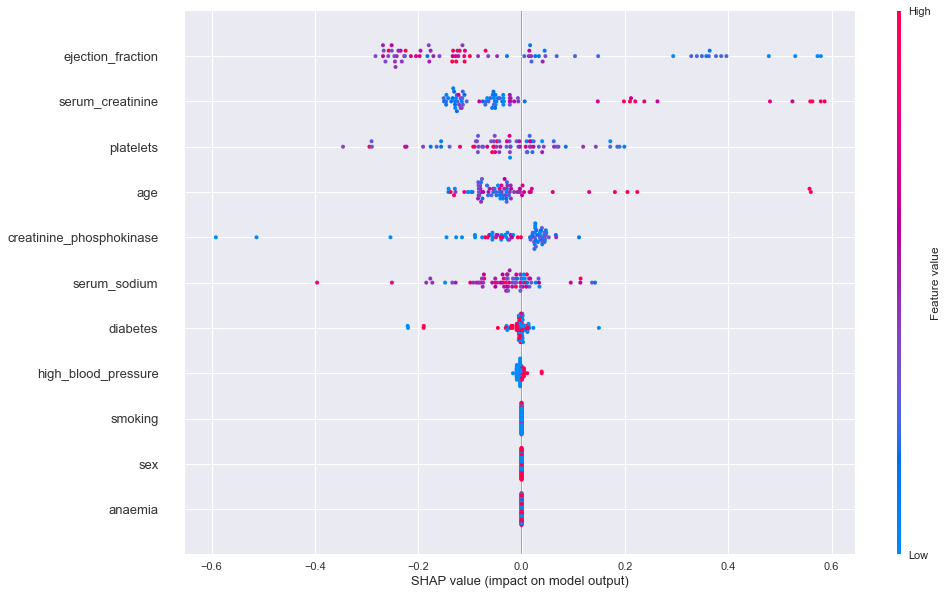

In [147]:
with plt.style.context('seaborn'):
    shap.summary_plot(explainer_dt.shap_values(X_test)[1],features=X_test,plot_type='dot',plot_size=(15,10))

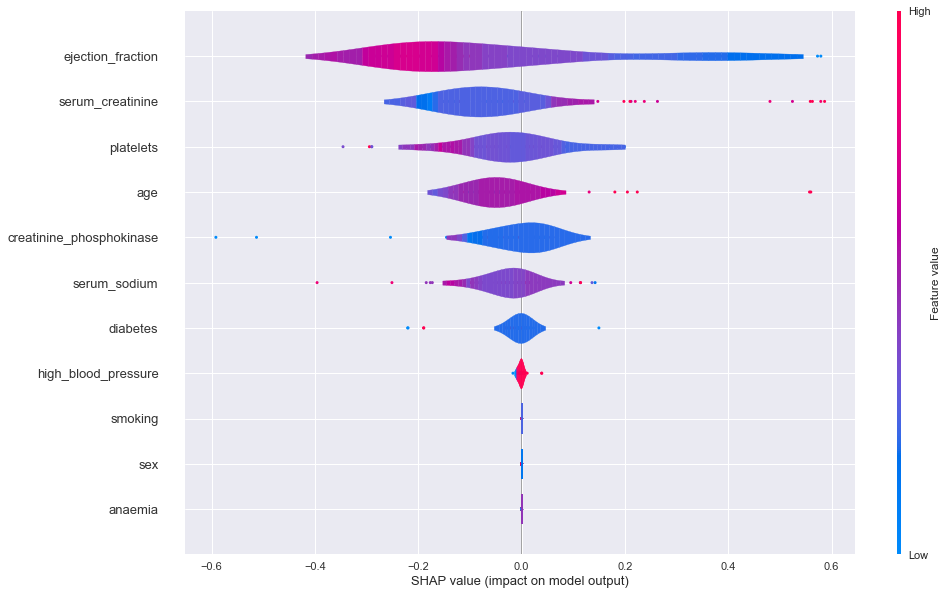

In [151]:
with plt.style.context('seaborn'):
    shap.summary_plot(explainer_dt.shap_values(X_test)[1],features=X_test,plot_type='violin',plot_size=(15,10))